<a href="https://colab.research.google.com/github/julianasaha/food-sales-predications/blob/main/Food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [4]:
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Part 2

In [5]:
# 1)How many rows and columns?
df.shape

(8523, 12)

There is 8523 rows and 12 columns.

In [6]:
#2) What are the datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are 4 floats, 1 integer and 7 objects.

In [7]:
#3) Are there duplicates? If so, drop any duplicates
df.duplicated().sum()

0

There are no duplicated rows.

In [8]:
#4) Identify missing values.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are 1463 out of 7060 values missing from Item_Weight. 
There are 2410 out of 6113 values missing from Outlet_Size. 

In [9]:
# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
df.drop(columns= ['Item_Weight'], inplace = True)

In [10]:
#Outlet_mean = df['Outlet_Size'].mean()
#df['Outlet_Size'].fillna('Outlet_mean', inplace=True)
df['Outlet_Size'].fillna('Missing', inplace=True)


I have decided to remove the Item_weight column because I believe it is not essential information that will help increase prices. A lighter weight item can be just as vauable as a heavy item. 


I have decided to fill in the missing values of Outlet_Size with 'Missing' because it is likely that we can find out the size of a store later by looking it up online or even looking at the google maps to  get an estimate on how big a store is.I also believe that keeping this column is important because the size of a store can impact sales as they are able to carry more products if the store is larger.

In [11]:
# 6) Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
df.describe().round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,0.07,140.99,1997.83,2181.29
std,0.05,62.28,8.37,1706.50
min,0.00,31.29,1985.00,33.29
25%,0.03,93.83,1987.00,834.25
50%,0.05,143.01,1999.00,1794.33
75%,0.09,185.64,2004.00,3101.30
max,0.33,266.89,2009.00,13086.96


Histogram

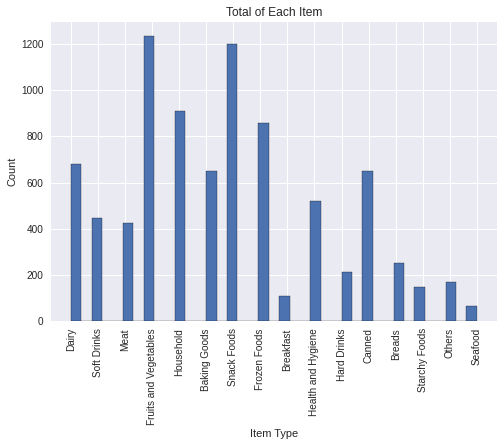

In [17]:
# Find out the quality of each type of item
df['Item_Type'].hist(bins='auto', edgecolor='black')
plt.style.use('seaborn')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Total of Each Item')
plt.xticks(rotation = 90);

The top three carried item types at these stores are 'Fruit and Vegatables', 'Snack Foods', and 'Household'.

Boxplot

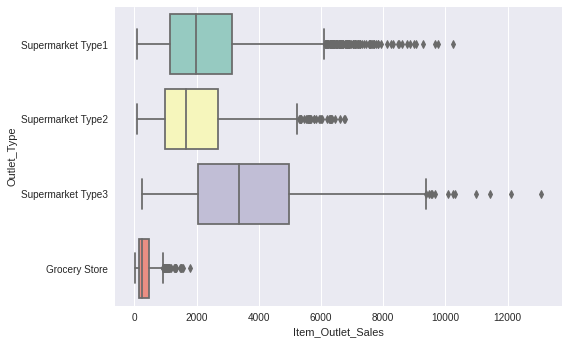

In [18]:
# Present a five number summaray for each store
sns.boxplot(data=df, x='Item_Outlet_Sales', y='Outlet_Type',
            order=['Supermarket Type1', 'Supermarket Type2','Supermarket Type3','Grocery Store'], palette="Set3");

The boxplot indicates that Supermarket 'Type3' has the highest sales while 'Grocery Store' has the lowest.

Heatmap

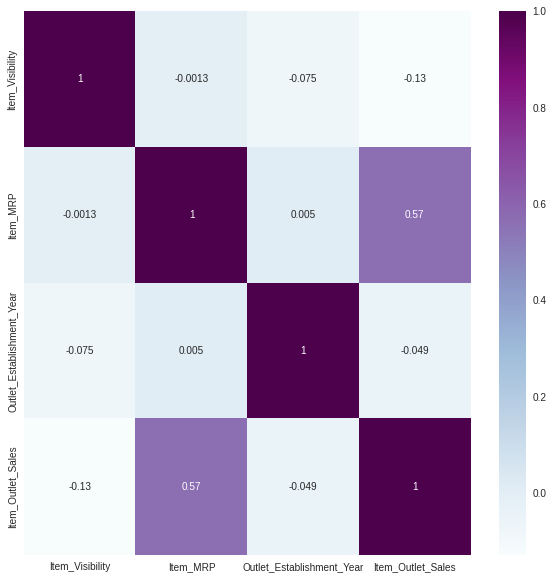

In [19]:
#find the correlation coefficients between two variables 
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='BuPu', annot=True,);

The strongest correlation indicated in this graph is between 'Item_MRP' and the weakest correlation is between 'Item_Visibility' and 'Item_Outlet_Sales'. Overall, there isn't any strong correlations, only moderate and low.

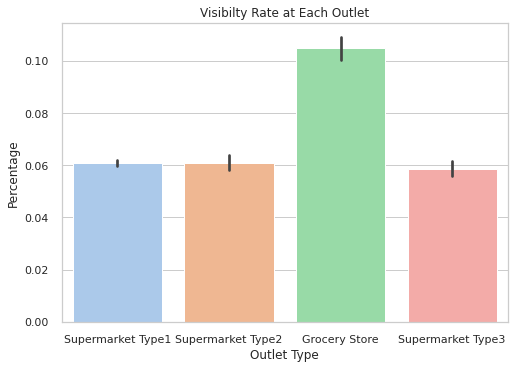

In [62]:
#graph the visibilty rate at each store 
ax = sns.barplot(data= df, x= 'Outlet_Type', y= 'Item_Visibility');
ax.set_title('Visibilty Rate at Each Outlet')
ax.set_ylabel('Percentage')
ax.set_xlabel('Outlet Type')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.labelsize'] = 'x-large'
sns.set_theme(style="whitegrid", palette="rocket")

We can see here that 'Grocery Store' has a significantly higher percentage of display area although it is the store while the lowest sales. Havig a low percenatge of display area could be a factor when increasing food sales as it has worked for the other stores being compared.

No handles with labels found to put in legend.


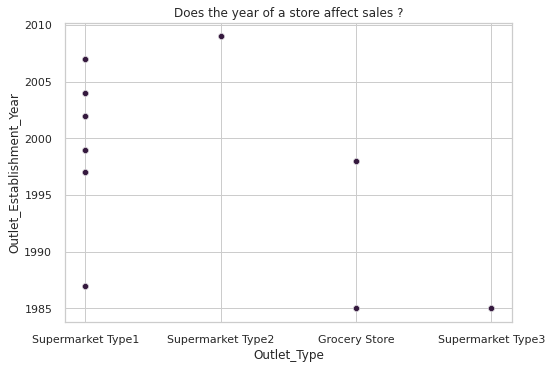

In [67]:
# grapgh the years of the outlet type
ax = sns.scatterplot(data=df, x = 'Outlet_Type', y ='Outlet_Establishment_Year', palette = 'rocket')
ax.legend().remove()
ax.set_title('Does the year of a store affect sales ?');

No handles with labels found to put in legend.


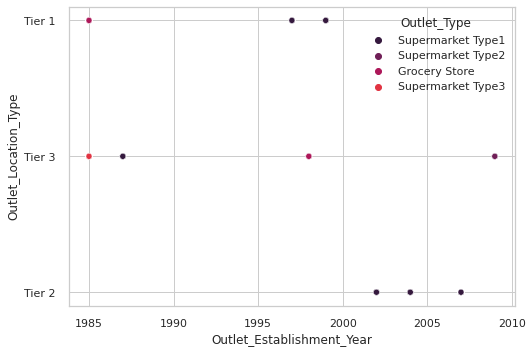

In [79]:
sns.scatterplot(data=df, x="Outlet_Establishment_Year", y="Outlet_Location_Type", hue="Outlet_Type")
ax.set_title('Does the year of a store affect sales ?')
ax.legend();

The two oldest outlets are 'Supermarket Type3' and 'Grocery Store'.